In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Load data

In [ ]:
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(file_path)
print("Dataset shape : ", data.shape)
print("__________________________________")
data.head()

Dataset shape :  (7043, 21)
__________________________________


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.describe(include="O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
df_categorical = data.select_dtypes(include=['object'])
for i in df_categorical.columns:
    print(i, " : ", df_categorical[i].unique())

customerID  :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges  :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  :  ['No' 'Yes']


# Data Cleaning

In [ ]:
data["MultipleLines"] = data["MultipleLines"].replace("No phone service", "No")
data = data.replace("No internet service", "No")

In [ ]:
df_categorical = data.select_dtypes(include=['object'])
for i in df_categorical.columns:
    print(i, " : ", df_categorical[i].unique())

customerID  :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges  :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  :  ['No' 'Yes']


In [ ]:
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"], errors='coerce')
(data.isnull().sum()/data.shape[0])*100

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


In [ ]:
data = data[~data["TotalCharges"].isnull()]

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Preprocess data

In [ ]:
def preprocess_data(data):
    data = data.drop(['customerID'], axis=1)

    # Encode categorical variables
    label_enc = LabelEncoder()
    for col in data.select_dtypes(include=['object']).columns:
        if col != 'Churn':
            data[col] = label_enc.fit_transform(data[col])

    # Encode target variable
    data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Separate features and target
    X = data.drop('Churn', axis=1)
    y = data['Churn']

    # Scale numerical features
    scaler = StandardScaler()
    X[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

    return X, y

X, y = preprocess_data(data)

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,-0.854336,-1.183614,-0.633746,1.378330,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,0.399805,-1.161694,-0.994194
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.854336,-1.183614,1.577918,-0.725516,1.381372,-0.639260,-0.790186,-0.796849,0.373926,-1.206361,1.336636,-0.260878,-0.173740
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,-1.183614,1.577918,1.378330,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,1.336636,-0.363923,-0.959649
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,-0.854336,-1.183614,1.577918,-0.725516,1.381372,1.564308,-0.790186,-0.796849,0.373926,-1.206361,-1.473857,-0.747850,-0.195248
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,0.172835,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,0.399805,0.196178,-0.940457


<Axes: >

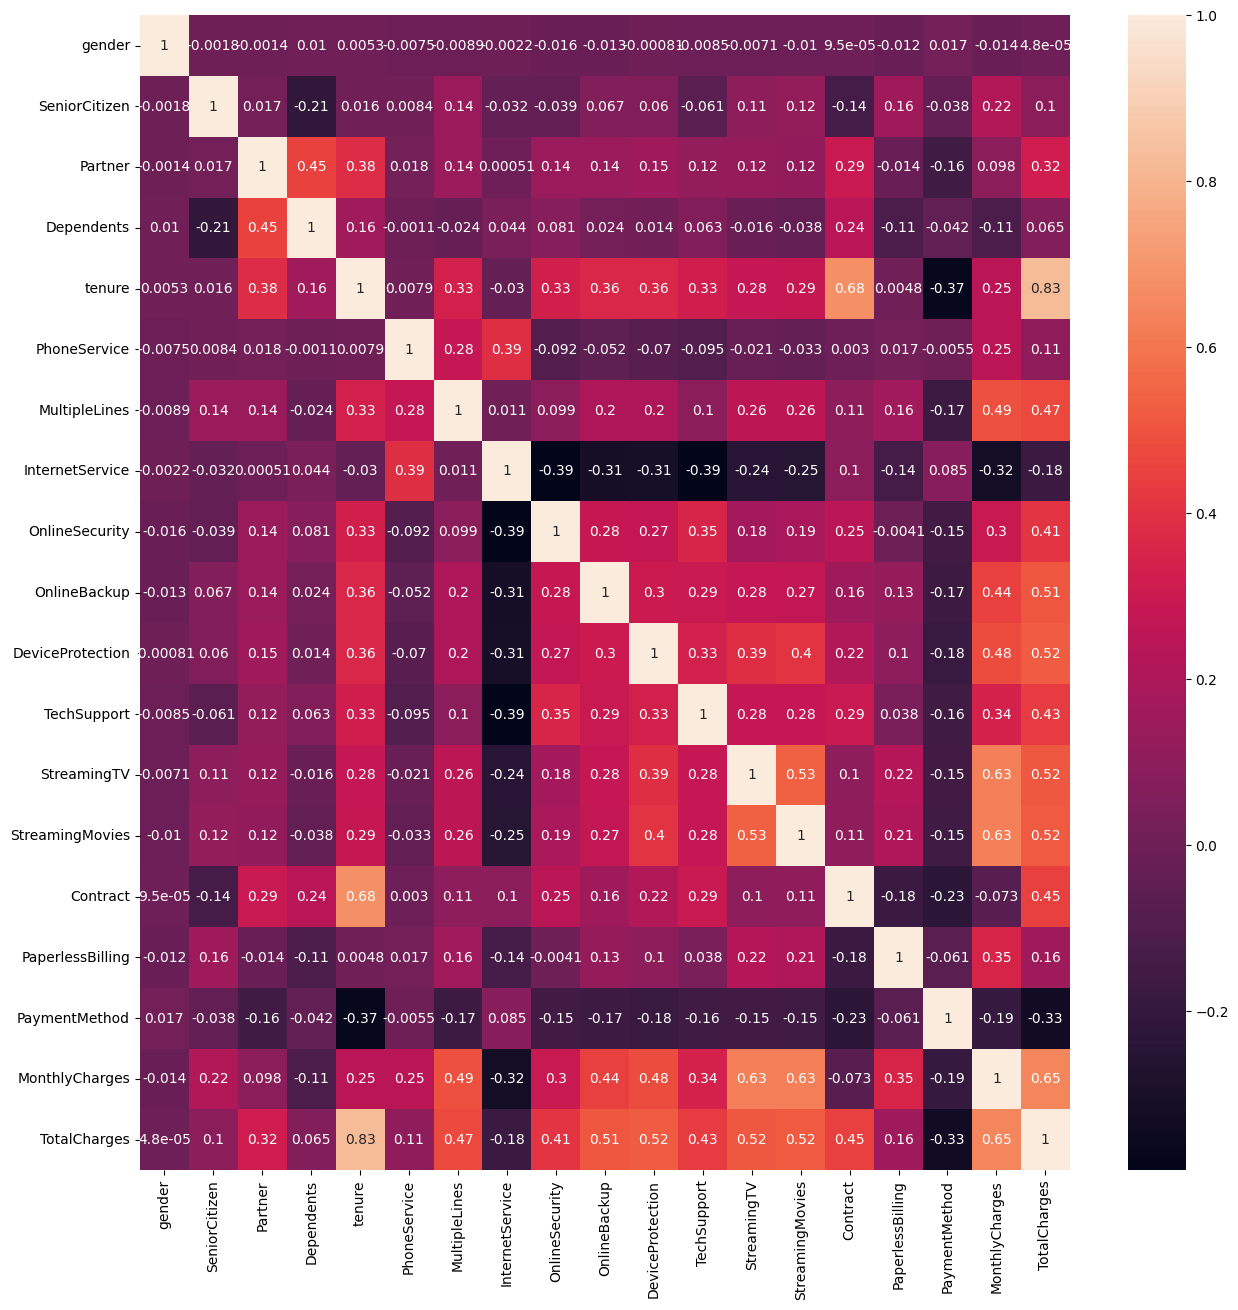

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True)

In [ ]:
def drop_highly_correlated_columns(df, threshold=0.8):
    corr_matrix = df.corr()

    # Create a set to hold the columns to drop
    columns_to_drop = set()

    # Iterate through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_to_drop = corr_matrix.columns[i]
                columns_to_drop.add(col_to_drop)
    print(f"Number of columns to drop: {len(columns_to_drop)} and column: {columns_to_drop}")

    # Drop the highly correlated columns
    print("Before dropping Dataset shape is :", df.shape)
    df_reduced = df.drop(columns=columns_to_drop)
    print("After dropping Dataset shape is :", df_reduced.shape)
    return df_reduced

X = drop_highly_correlated_columns(X, threshold=0.8)

Number of columns to drop: 1 and column: {'TotalCharges'}
Before dropping Dataset shape is : (7032, 19)
After dropping Dataset shape is : (7032, 18)


In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,-0.854336,-1.183614,-0.633746,1.378330,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,0.399805,-1.161694
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.854336,-1.183614,1.577918,-0.725516,1.381372,-0.639260,-0.790186,-0.796849,0.373926,-1.206361,1.336636,-0.260878
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,-1.183614,1.577918,1.378330,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,1.336636,-0.363923
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,-0.854336,-1.183614,1.577918,-0.725516,1.381372,1.564308,-0.790186,-0.796849,0.373926,-1.206361,-1.473857,-0.747850
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,0.172835,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,-0.796849,-0.826735,0.828939,0.399805,0.196178


Text(0.5, 1.0, 'Distribution of Churn')

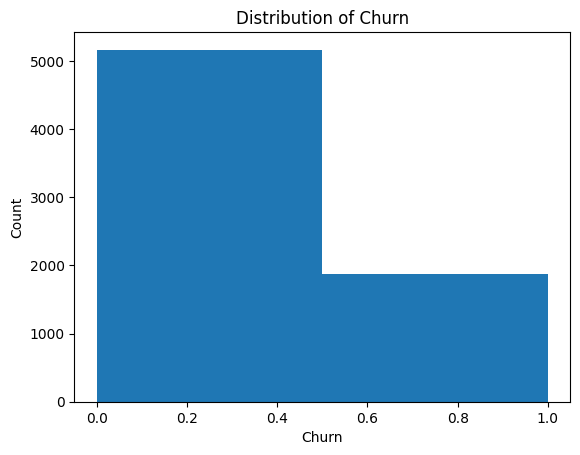

In [ ]:
plt.hist(y, bins=2)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')

# Split data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train multiple models

In [ ]:
def train_models(X_train, y_train):
    models = {
        # "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42)
    }
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
    return trained_models

models = train_models(X_train, y_train)

# Evaluate models

In [ ]:
def evaluate_models(models, X_test, y_test):
    results = []
    for name, model in models.items():
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred)
        }

        if y_prob is not None:
            metrics["ROC-AUC"] = roc_auc_score(y_test, y_prob)

        results.append(metrics)
        print(f"\nModel: {name}")
        print("__________________________________")
        print(f"Accuracy: {metrics['Accuracy']:.2f}")
        print(f"Precision: {metrics['Precision']:.2f}")
        print(f"Recall: {metrics['Recall']:.2f}")
        print(f"F1 Score: {metrics['F1 Score']:.2f}")
        if "ROC-AUC" in metrics:
            print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")
        print(classification_report(y_test, y_pred))

    return pd.DataFrame(results)

results = evaluate_models(models, X_test, y_test)
print("\nSummary of Model Performance:")
print("__________________________________")
print(results)


Model: Random Forest
__________________________________
Accuracy: 0.78
Precision: 0.62
Recall: 0.49
F1 Score: 0.55
ROC-AUC: 0.81
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407


Model: Gradient Boosting
__________________________________
Accuracy: 0.80
Precision: 0.65
Recall: 0.54
F1 Score: 0.59
ROC-AUC: 0.84
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407


Summary of Model Performance:
__________________________________
               M

# Select best model based on a specific metric

In [ ]:
def select_best_model(results):
    best_model = results.sort_values(by="F1 Score", ascending=False).iloc[0]
    print(f"\nBest Model: {best_model['Model']}")
    print("__________________________________")
    print(f"Accuracy: {best_model['Accuracy']:.2f}")
    print(f"Precision: {best_model['Precision']:.2f}")
    print(f"Recall: {best_model['Recall']:.2f}")
    print(f"F1 Score: {best_model['F1 Score']:.2f}")
    if "ROC-AUC" in best_model:
        print(f"ROC-AUC: {best_model['ROC-AUC']:.2f}")
    return best_model

best_model = select_best_model(results)
best_model_name = best_model['Model']


Best Model: Gradient Boosting
__________________________________
Accuracy: 0.80
Precision: 0.65
Recall: 0.54
F1 Score: 0.59
ROC-AUC: 0.84


# Retrain the best model using top features

In [ ]:
def feature_importance(model, X_columns):
    if hasattr(model, "feature_importances_"):
        # Get feature names used by the model
        feature_names = model.feature_names_in_ if hasattr(model, 'feature_names_in_') else X_columns

        importance_df = pd.DataFrame({
            "Feature": feature_names,  # Use feature_names instead of X_columns
            "Importance": model.feature_importances_
        }).sort_values(by="Importance", ascending=False)
        print("__________________________________")
        print("\nFeature Importances:")
        print("__________________________________")
        print(importance_df)
        return importance_df
    else:
        print("Feature importance is not available for this model.")

def retrain_with_top_features(best_model_name, top_features, X_train, y_train, X_test, y_test):
    print("__________________________________")
    print(f"\nRetraining the best model ({best_model_name}) with top features...")
    # Use the 'Feature' column for selecting top features instead of index
    top_features = top_features['Feature'][:5]
    X_train_reduced = X_train.loc[:, top_features]
    X_test_reduced = X_test.loc[:, top_features]

    if best_model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    elif best_model_name == "Gradient Boosting":
        model = GradientBoostingClassifier(random_state=42)
    else:
        model = LogisticRegression(random_state=42)

    model.fit(X_train_reduced, y_train)
    y_pred = model.predict(X_test_reduced)
    y_prob = model.predict_proba(X_test_reduced)[:, 1]
    print("__________________________________")
    print("\nRetrained Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.2f}")

if best_model_name in ["Random Forest", "Gradient Boosting"]:
        best_model_instance = models[best_model_name]
        importance_df = feature_importance(best_model_instance, data.drop('Churn', axis=1).columns)

        # Get top 5 feature names from the 'Feature' column
        top_features = importance_df['Feature'][:5].tolist()


        # Retrain the best model with top features
        retrain_with_top_features(best_model_name, importance_df, X_train, y_train, X_test, y_test)

__________________________________

Feature Importances:
__________________________________
             Feature  Importance
14          Contract    0.451720
4             tenure    0.199208
17    MonthlyCharges    0.178249
7    InternetService    0.043098
8     OnlineSecurity    0.029797
16     PaymentMethod    0.024546
15  PaperlessBilling    0.016528
11       TechSupport    0.012486
1      SeniorCitizen    0.010821
5       PhoneService    0.007866
9       OnlineBackup    0.005123
6      MultipleLines    0.005119
0             gender    0.004639
3         Dependents    0.004366
13   StreamingMovies    0.003307
12       StreamingTV    0.002128
10  DeviceProtection    0.000570
2            Partner    0.000429
__________________________________

Retraining the best model (Gradient Boosting) with top features...
__________________________________

Retrained Model Performance:
Accuracy: 0.78
Precision: 0.61
Recall: 0.49
F1 Score: 0.54
ROC-AUC: 0.83
